In [1]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [3]:
data = pd.read_csv("Downloads\\student_health_data (1).csv")
data

,Student_ID,Age,Gender,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Stress_Level_Biosensor,Stress_Level_Self_Report,Physical_Activity,Sleep_Quality,Mood,Study_Hours,Project_Hours,Health_Risk_Level
0,1,24,M,50.663217,122.173015,84.419860,3.137350,9.028669,High,Moderate,Happy,34.520973,16.800956,Moderate
1,2,21,F,57.926042,110.778407,75.696145,3.699078,5.819697,Moderate,Good,Stressed,16.763846,15.791154,Moderate
2,3,22,M,59.294219,109.375673,83.803814,6.785156,5.892360,Low,Moderate,Happy,44.203798,25.678437,Moderate
3,4,24,M,76.826232,125.142227,78.091587,6.408509,6.884001,High,Poor,Happy,21.776645,20.808391,High
4,5,20,M,68.342769,107.515592,80.674937,7.264719,4.483450,Moderate,Poor,Happy,8.964999,15.194045,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,23,F,68.185217,126.031324,69.156288,8.318278,6.841725,Moderate,Moderate,Stressed,30.554113,9.491591,Moderate
996,997,18,F,77.720216,100.627116,75.569051,6.295881,4.152130,High,Poor,Happy,29.285850,22.819961,High
997,998,24,M,85.313237,124.362792,91.817614,2.896868,9.253887,Moderate,Good,Happy,15.330941,19.010784,Moderate
998,999,21,M,79.212477,106.370246,77.218808,3.130484,2.205774,Low,Poor,Neutral,31.921143,9.159565,Low


In [4]:
print("Missing values before cleaning:")
data.isnull().sum()

Missing values before cleaning:


Student_ID                  0
Age                         0
Gender                      0
Heart_Rate                  0
Blood_Pressure_Systolic     0
Blood_Pressure_Diastolic    0
Stress_Level_Biosensor      0
Stress_Level_Self_Report    0
Physical_Activity           0
Sleep_Quality               0
Mood                        0
Study_Hours                 0
Project_Hours               0
Health_Risk_Level           0
dtype: int64

In [5]:
data.columns

Index(['Student_ID', 'Age', 'Gender', 'Heart_Rate', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Stress_Level_Biosensor',
       'Stress_Level_Self_Report', 'Physical_Activity', 'Sleep_Quality',
       'Mood', 'Study_Hours', 'Project_Hours', 'Health_Risk_Level'],
      dtype='object')

In [32]:
# data.drop(columns=['Student_ID'],inplace=True)

In [6]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Heart_Rate                1000 non-null   float64
 4   Blood_Pressure_Systolic   1000 non-null   float64
 5   Blood_Pressure_Diastolic  1000 non-null   float64
 6   Stress_Level_Biosensor    1000 non-null   float64
 7   Stress_Level_Self_Report  1000 non-null   float64
 8   Physical_Activity         1000 non-null   object 
 9   Sleep_Quality             1000 non-null   object 
 10  Mood                      1000 non-null   object 
 11  Study_Hours               1000 non-null   float64
 12  Project_Hours             1000 non-null   float64
 13  Health_Risk_Level         1000 non-null   object 
dtypes: float6

In [7]:
import pandas as pd
from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(data.select_dtypes(include=[float, int]))  # Only calculate Z-scores for numeric columns
abs_z_scores = abs(z_scores)

# Define threshold (commonly 3)
threshold = 3

# Filter out rows with Z-scores above the threshold
f_data = data[(abs_z_scores < threshold).all(axis=1)]

# Show the result
print(f"Original dataset size: {data.shape}")
print(f"Filtered dataset size: {f_data.shape}")

Original dataset size: (1000, 14)
Filtered dataset size: (993, 14)


In [8]:
f_data.isnull().sum()

Student_ID                  0
Age                         0
Gender                      0
Heart_Rate                  0
Blood_Pressure_Systolic     0
Blood_Pressure_Diastolic    0
Stress_Level_Biosensor      0
Stress_Level_Self_Report    0
Physical_Activity           0
Sleep_Quality               0
Mood                        0
Study_Hours                 0
Project_Hours               0
Health_Risk_Level           0
dtype: int64

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'f_data' is your dataframe

# Step 1: Identify non-numeric columns
non_numeric_columns = f_data.select_dtypes(include=['object']).columns

# Step 2: Apply Label Encoding to all non-numeric columns
label_encoder = LabelEncoder()

# Loop through all non-numeric columns and apply label encoding
for col in non_numeric_columns:
    f_data.loc[:, col] = label_encoder.fit_transform(f_data[col])

# Now, all columns in f_data should be numeric
print(f_data.head())


   Student_ID  Age Gender  Heart_Rate  Blood_Pressure_Systolic  \
0           1   24      1   50.663217               122.173015   
1           2   21      0   57.926042               110.778407   
2           3   22      1   59.294219               109.375673   
3           4   24      1   76.826232               125.142227   
4           5   20      1   68.342769               107.515592   

   Blood_Pressure_Diastolic  Stress_Level_Biosensor  Stress_Level_Self_Report  \
0                 84.419860                3.137350                  9.028669   
1                 75.696145                3.699078                  5.819697   
2                 83.803814                6.785156                  5.892360   
3                 78.091587                6.408509                  6.884001   
4                 80.674937                7.264719                  4.483450   

  Physical_Activity Sleep_Quality Mood  Study_Hours  Project_Hours  \
0                 0             1    0    34.5

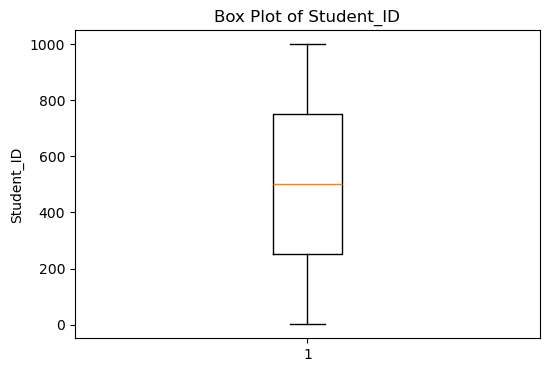

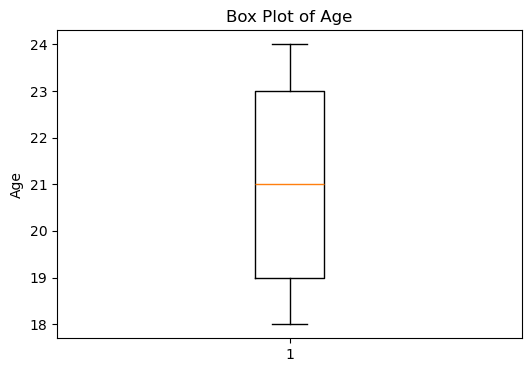

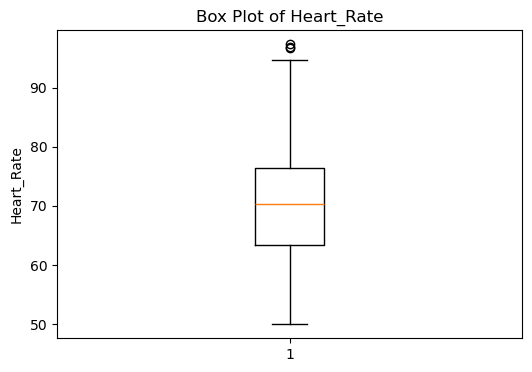

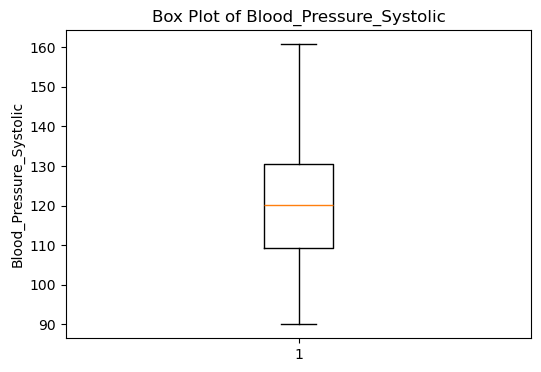

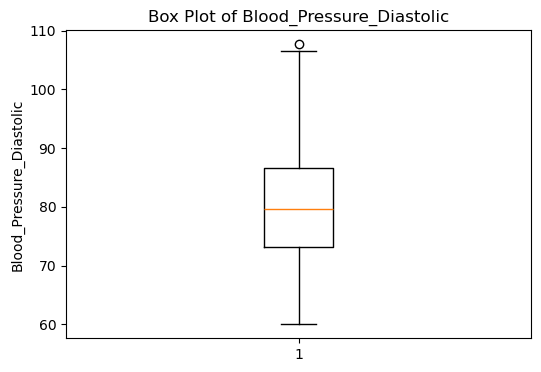

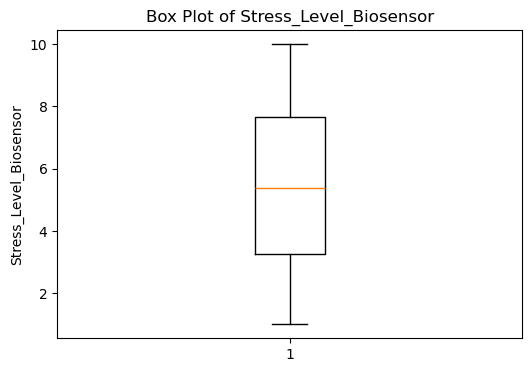

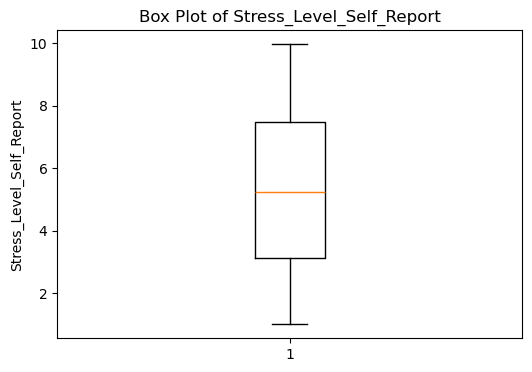

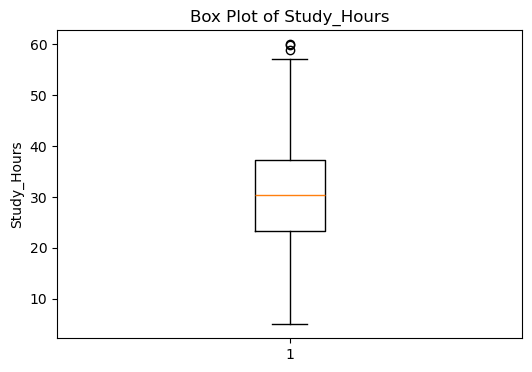

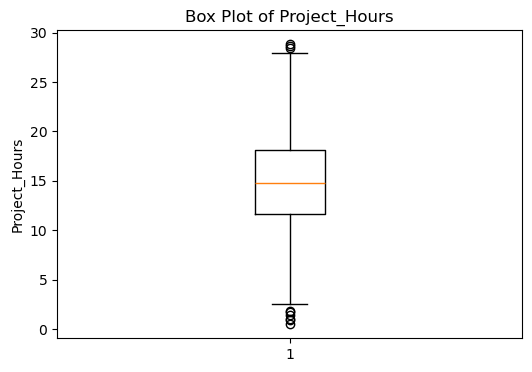

In [10]:
import matplotlib.pyplot as plt

# Assuming your dataset is stored in 'df'
# Select only the numerical columns (integers and floats)
numerical_data = f_data.select_dtypes(include=['float64', 'int64'])

# Loop through each numerical column and plot the boxplot
for column in numerical_data.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(numerical_data[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()


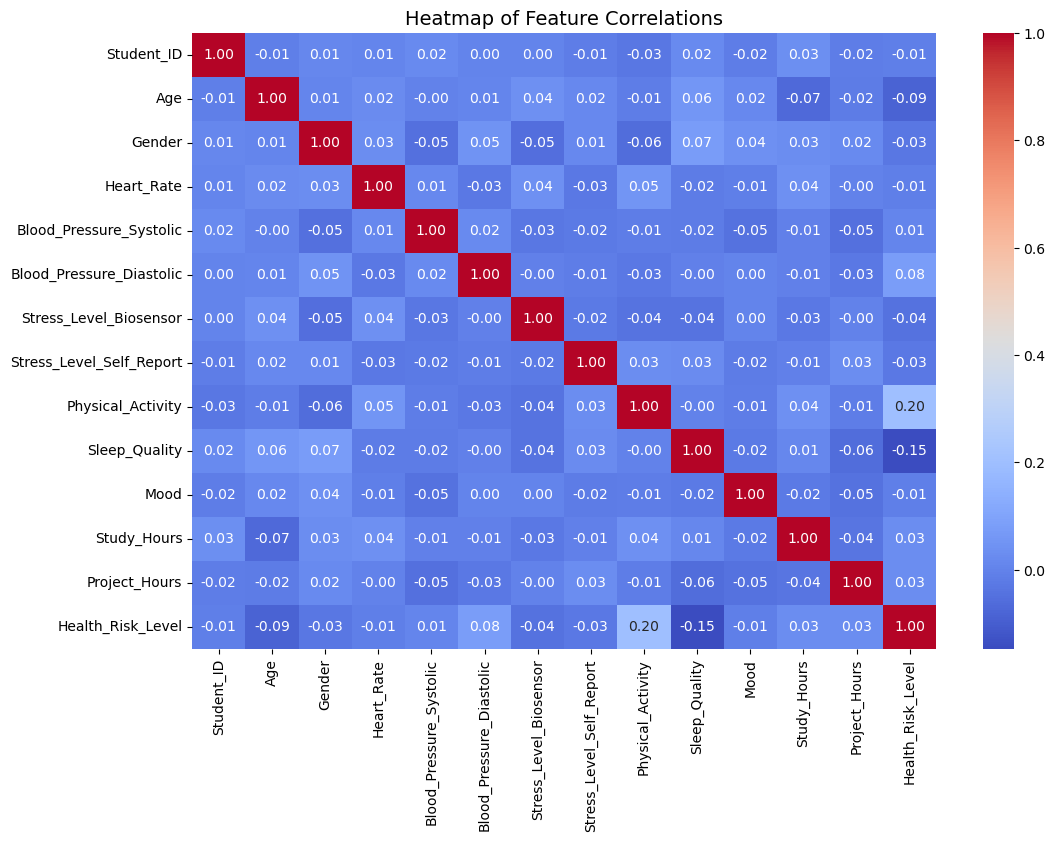

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = f_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add titles
plt.title("Heatmap of Feature Correlations", fontsize=14)
plt.show()




In [12]:

X = f_data.drop('Health_Risk_Level', axis=1)  # Features
y = f_data['Health_Risk_Level']  # Target variable

# Encode target variable if it is categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Step 4: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 6: Train the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Step 9: Print results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_output)


Accuracy: 0.9865771812080537
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        37
           1       1.00      1.00      1.00        54
           2       0.98      1.00      0.99       207

    accuracy                           0.99       298
   macro avg       0.99      0.96      0.98       298
weighted avg       0.99      0.99      0.99       298



In [13]:
# Try multiple models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - MSE: {mse:.2f}, R²: {r2:.2f}")



Random Forest - MSE: 0.01, R²: 0.97
Linear Regression - MSE: 0.47, R²: 0.04
Decision Tree - MSE: 0.00, R²: 1.00


In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=5000, solver='saga', penalty='l1'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine (SVM)': SVC(),
    'K-Nearest Neighbors (k-NN)': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each model
for name, classifier in classifiers.items():
    # Train the model
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{report}")
    print('-' * 50)

Model: Logistic Regression
Accuracy: 0.8154
Confusion Matrix:
[[  9   2  26]
 [  0  35  19]
 [  3   5 199]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.24      0.37        37
           1       0.83      0.65      0.73        54
           2       0.82      0.96      0.88       207

    accuracy                           0.82       298
   macro avg       0.80      0.62      0.66       298
weighted avg       0.81      0.82      0.79       298

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.9866
Confusion Matrix:
[[ 37   0   0]
 [  0  54   0]
 [  4   0 203]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        37
           1       1.00      1.00      1.00        54
           2       1.00      0.98      0.99       207

    accuracy                           0.99       298
   macro avg       0.97      0.99      0